# Environment Set up

## Mount drive

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  !{sys.executable} -m pip install -U ydata-profiling[notebook]
  !pip install jupyter-contrib-nbextensions
  !jupyter nbextension enable --py widgetsnbextension
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import plotly
np.random.seed(0)
from rich import print
from rich.columns import Columns
from rich.panel import Panel
from rich.align import Align
from source.utils.print_util import *
from source.utils.data_preprocessing import *
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

# Data loading and Config

## Configuration

In [3]:
dataset_path = path_to_project + '/data/raw/alzheimers-disease.csv' if IN_COLAB else 'data/raw/alzheimers-disease.csv'
X = ["PatientID", "Age", "EducationLevel", "BMI", "Smoking", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury", "Hypertension", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "MemoryComplaints", "BehavioralProblems", "ADL", "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness", "Diagnosis", "DoctorInCharge"]
Y = 'Outcome'
Y_labels = 'No Alzheimer','Alzheimer'
sensible_attribute = "Gender_cat", "Ethnicity_cat"
G =  ['Gender', 'Ethnicity']

In [4]:
sensible_attribute_map = {
    "Ethnicity_cat":{1: "Caucasian",
    0: "Non-Caucasian"},
    "Gender_cat":{1: "Male", 0: "Female"}

}

## Load Data

In [5]:
df=pd.read_csv(dataset_path)
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [6]:
rows, columns = df.shape

# Display the result
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2149

Number of columns: 35

In [7]:
df['Gender_cat'] = df['Gender'].apply(lambda x: 0 if x == 1 else 1)

# Display the first rows to verify the transformation
print(df[['Gender_cat', 'Gender']].head())

Gender_cat  Gender
0           1       0
1           1       0
2           1       0
3           0       1
4           1       0

In [8]:
# Change the values in the 'Ethnicity' column
df['Ethnicity_cat'] = df['Ethnicity'].apply(lambda x: 1 if x == 0 else 0)

# Verify the change
print(df[['Ethnicity_cat', 'Ethnicity']].head())

Ethnicity_cat  Ethnicity
0              1          0
1              1          0
2              0          3
3              1          0
4              1          0

In [9]:
print(df)

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...       ADL  \
0              13.297218          6.327112     1.347214  ...  1.725883   
1               4.542524          7.619885     0.518767  ...  2.592424   
2              19.555085          7.844988     1.826335  ...  7.119548   
3              12.209266          8.428001     7.435604  ...  6.481226   
4              18.454356          6.310461     0.795498  ...  0.014691   
...                  ...               ...          ...  ...       ...   
2144            1.561126          4.049964     6.555306  ...  4.492838   
2145           18.767261          1.360667     2.904662  ...  9.204952   
2146            4.594670          9.886002     8.120025  ...  5.036334   
2147            8.674505          6.354282     1.263427  ...  3.785399   
2148            7.890703          6.570993     7.941404  ...  8.327563   

      Confusion  Disorientation  PersonalityChanges  \
0             0               0                   0   
1             0               0                   0   
2             0               1                   0   
3             0               0                   0   
4             0               0                   1   
...         ...             ...                 ...   
2144          1               0                   0   
2145          0               0                   0   
2146          0               0                   0   
2147          0               0                   0   
2148          0               1                   0   

      DifficultyCompletingTasks  Forgetfulness  Diagnosis  DoctorInCharge  \
0                             1              0          0       XXXConfid   
1                             0              1          0       XXXConfid   
2                             1              0          0       XXXConfid   
3                             0              0          0       XXXConfid   
4                             1              0          0       XXXConfid   
...                         ...            ...        ...             ...   
2144                          0              0          1       XXXConfid   
2145                          0              0          1       XXXConfid   
2146                          0              0          1       XXXConfid   
2147                          0              1          1       XXXConfid   
2148                          0              1          0       XXXConfid   

      Gender_cat  Ethnicity_cat  
0              1              1  
1              1              1  
2              1              0  
3              0              1  
4              1              1  
...          ...            ...  
2144           1              1  
2145           1              1  
2146           1              1  
2147           0              0  
2148           1              1  

[2149 rows x 37 columns]

## Raw Probabilities calculus

In [10]:
# Calculate the total number of cases where Diagnosis = 1 and Diagnosis = 0
total_Y1 = df[df['Diagnosis'] == 1].shape[0]
total_Y0 = df[df['Diagnosis'] == 0].shape[0]

# Calculate Pr(Y=1) and Pr(Y=0)
pr_Y1 = total_Y1 / len(df) if len(df) > 0 else 0  # Handling division by zero
pr_Y0 = total_Y0 / len(df) if len(df) > 0 else 0  # Handling division by zero

# Print the results
print(f'Pr(Y=1): {pr_Y1:.9f}')
print(f'Pr(Y=0): {pr_Y0:.9f}')

Pr(Y=1): 0.353652862

Pr(Y=0): 0.646347138

In [11]:
# Filter the cases
cases_Y1_G1 = df[(df['Diagnosis'] == 1) & (df['Gender_cat'] == 1)].shape[0]
cases_Y1_G0 = df[(df['Diagnosis'] == 1) & (df['Gender_cat'] == 0)].shape[0]
cases_Y0_G1 = df[(df['Diagnosis'] == 0) & (df['Gender_cat'] == 1)].shape[0]
cases_Y0_G0 = df[(df['Diagnosis'] == 0) & (df['Gender_cat'] == 0)].shape[0]

In [12]:
total_G1 = df[df['Gender_cat'] == 1].shape[0]
total_G0 = df[df['Gender_cat'] == 0].shape[0]

pr_Y1_G1 = cases_Y1_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y1_G0 = cases_Y1_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero
pr_Y0_G1 = cases_Y0_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y0_G0 = cases_Y0_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero

pr_G1 = total_G1 / len(df) if len(df) > 0 else 0  # Handling division by zero
pr_G0 = total_G0 / len(df) if len(df) > 0 else 0  # Handling division by zero

# Print the results
print(f'Total G1: {total_G1}')
print(f'Total G0: {total_G0}')
print(f'Pr(Y=1 | G=1): {pr_Y1_G1:.9f}')
print(f'Pr(Y=1 | G=0): {pr_Y1_G0:.9f}')
print(f'Pr(Y=0 | G=1): {pr_Y0_G1:.9f}')
print(f'Pr(Y=0 | G=0): {pr_Y0_G0:.9f}')
print(f'Pr(G=1): {pr_G1:.9f}')
print(f'Pr(G=0): {pr_G0:.9f}')



Total G1: 1061

Total G0: 1088

Pr(Y=1 | G=1): 0.363807729

Pr(Y=1 | G=0): 0.343750000

Pr(Y=0 | G=1): 0.636192271

Pr(Y=0 | G=0): 0.656250000

Pr(G=1): 0.493718008

Pr(G=0): 0.506281992

In [13]:
# Filter the cases
cases_Y1_G1 = df[(df['Diagnosis'] == 1) & (df['Ethnicity_cat'] == 1)].shape[0]
cases_Y1_G0 = df[(df['Diagnosis'] == 1) & (df['Ethnicity_cat'] == 0)].shape[0]
cases_Y0_G1 = df[(df['Diagnosis'] == 0) & (df['Ethnicity_cat'] == 1)].shape[0]
cases_Y0_G0 = df[(df['Diagnosis'] == 0) & (df['Ethnicity_cat'] == 0)].shape[0]

In [14]:
total_G1 = df[df['Ethnicity_cat'] == 1].shape[0]
total_G0 = df[df['Ethnicity_cat'] == 0].shape[0]

pr_Y1_G1 = cases_Y1_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y1_G0 = cases_Y1_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero
pr_Y0_G1 = cases_Y0_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y0_G0 = cases_Y0_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero

pr_G1 = total_G1 / len(df) if len(df) > 0 else 0  # Handling division by zero
pr_G0 = total_G0 / len(df) if len(df) > 0 else 0  # Handling division by zero

# Print the results
print(f'Total G1: {total_G1}')
print(f'Total G0: {total_G0}')
print(f'Pr(Y=1 | G=1): {pr_Y1_G1:.9f}')
print(f'Pr(Y=1 | G=0): {pr_Y1_G0:.9f}')
print(f'Pr(Y=0 | G=1): {pr_Y0_G1:.9f}')
print(f'Pr(Y=0 | G=0): {pr_Y0_G0:.9f}')
print(f'Pr(G=1): {pr_G1:.9f}')
print(f'Pr(G=0): {pr_G0:.9f}')

Total G1: 1278

Total G0: 871

Pr(Y=1 | G=1): 0.362284820

Pr(Y=1 | G=0): 0.340987371

Pr(Y=0 | G=1): 0.637715180

Pr(Y=0 | G=0): 0.659012629

Pr(G=1): 0.594695207

Pr(G=0): 0.405304793

## Missing value check

In [15]:
# Count the null elements in each column
nulls_per_column = df.isnull().sum()

# Filter only the columns with nulls
nulls_per_column = nulls_per_column[nulls_per_column > 0]

# Display the results as a full string without truncation
print(nulls_per_column.to_string())

Series([], )

# Preprocessing

## Outlier Detection

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [17]:
# Use the function in utils to remove outliers
attributes = ['MemoryComplaints', 'BehavioralProblems', 'CholesterolHDL', 'Hypertension','CardiovascularDisease','BMI']
#df = search_and_remove_outliers(df, attributes)

In [16]:
# First 2 integer attributes
fig = plotly.boxplot_frame(df, y=['MemoryComplaints', 'BehavioralProblems', 'CholesterolHDL', 'Hypertension','CardiovascularDisease','BMI'])
fig.show()

# Preprocessed Probabilistic Analysis

In [19]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge,Gender_cat,Ethnicity_cat
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,1.725883,0,0,0,1,0,0,XXXConfid,1,1
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,2.592424,0,0,0,0,1,0,XXXConfid,1,1
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,7.119548,0,1,0,1,0,0,XXXConfid,1,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,6.481226,0,0,0,0,0,0,XXXConfid,0,1
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0.014691,0,0,1,1,0,0,XXXConfid,1,1


In [20]:
rows, columns = df.shape

# Display the result
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2149

Number of columns: 37

In [21]:
# Calculate the total number of cases where Diagnosis = 1 and Diagnosis = 0
total_Y1 = df[df['Diagnosis'] == 1].shape[0]
total_Y0 = df[df['Diagnosis'] == 0].shape[0]

# Calculate Pr(Y=1) and Pr(Y=0)
pr_Y1 = total_Y1 / len(df) if len(df) > 0 else 0  # Handling division by zero
pr_Y0 = total_Y0 / len(df) if len(df) > 0 else 0  # Handling division by zero

# Print the results
print(f'Pr(Y=1): {pr_Y1:.9f}')
print(f'Pr(Y=0): {pr_Y0:.9f}')

Pr(Y=1): 0.353652862

Pr(Y=0): 0.646347138

In [22]:
# Filter the cases
cases_Y1_G1 = df[(df['Diagnosis'] == 1) & (df['Gender_cat'] == 1)].shape[0]
cases_Y1_G0 = df[(df['Diagnosis'] == 1) & (df['Gender_cat'] == 0)].shape[0]
cases_Y0_G1 = df[(df['Diagnosis'] == 0) & (df['Gender_cat'] == 1)].shape[0]
cases_Y0_G0 = df[(df['Diagnosis'] == 0) & (df['Gender_cat'] == 0)].shape[0]

In [23]:
total_G1 = df[df['Gender_cat'] == 1].shape[0]
total_G0 = df[df['Gender_cat'] == 0].shape[0]

pr_Y1_G1 = cases_Y1_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y1_G0 = cases_Y1_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero
pr_Y0_G1 = cases_Y0_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y0_G0 = cases_Y0_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero

pr_G1 = total_G1 / len(df) if len(df) > 0 else 0  # Handling division by zero
pr_G0 = total_G0 / len(df) if len(df) > 0 else 0  # Handling division by zero

# Print the results
print(f'Total G1: {total_G1}')
print(f'Total G0: {total_G0}')
print(f'Pr(Y=1 | G=1): {pr_Y1_G1:.9f}')
print(f'Pr(Y=1 | G=0): {pr_Y1_G0:.9f}')
print(f'Pr(Y=0 | G=1): {pr_Y0_G1:.9f}')
print(f'Pr(Y=0 | G=0): {pr_Y0_G0:.9f}')
print(f'Pr(G=1): {pr_G1:.9f}')
print(f'Pr(G=0): {pr_G0:.9f}')



Total G1: 1061

Total G0: 1088

Pr(Y=1 | G=1): 0.363807729

Pr(Y=1 | G=0): 0.343750000

Pr(Y=0 | G=1): 0.636192271

Pr(Y=0 | G=0): 0.656250000

Pr(G=1): 0.493718008

Pr(G=0): 0.506281992

In [24]:
# Filter the cases
cases_Y1_G1 = df[(df['Diagnosis'] == 1) & (df['Ethnicity_cat'] == 1)].shape[0]
cases_Y1_G0 = df[(df['Diagnosis'] == 1) & (df['Ethnicity_cat'] == 0)].shape[0]
cases_Y0_G1 = df[(df['Diagnosis'] == 0) & (df['Ethnicity_cat'] == 1)].shape[0]
cases_Y0_G0 = df[(df['Diagnosis'] == 0) & (df['Ethnicity_cat'] == 0)].shape[0]

In [25]:
total_G1 = df[df['Ethnicity_cat'] == 1].shape[0]
total_G0 = df[df['Ethnicity_cat'] == 0].shape[0]

pr_Y1_G1 = cases_Y1_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y1_G0 = cases_Y1_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero
pr_Y0_G1 = cases_Y0_G1 / total_G1 if total_G1 > 0 else 0  # Handling division by zero
pr_Y0_G0 = cases_Y0_G0 / total_G0 if total_G0 > 0 else 0  # Handling division by zero

pr_G1 = total_G1 / len(df) if len(df) > 0 else 0  # Handling division by zero
pr_G0 = total_G0 / len(df) if len(df) > 0 else 0  # Handling division by zero

# Print the results
print(f'Total G1: {total_G1}')
print(f'Total G0: {total_G0}')
print(f'Pr(Y=1 | G=1): {pr_Y1_G1:.9f}')
print(f'Pr(Y=1 | G=0): {pr_Y1_G0:.9f}')
print(f'Pr(Y=0 | G=1): {pr_Y0_G1:.9f}')
print(f'Pr(Y=0 | G=0): {pr_Y0_G0:.9f}')
print(f'Pr(G=1): {pr_G1:.9f}')
print(f'Pr(G=0): {pr_G0:.9f}')

Total G1: 1278

Total G0: 871

Pr(Y=1 | G=1): 0.362284820

Pr(Y=1 | G=0): 0.340987371

Pr(Y=0 | G=1): 0.637715180

Pr(Y=0 | G=0): 0.659012629

Pr(G=1): 0.594695207

Pr(G=0): 0.405304793

# Visualization

In [26]:
df_category = df[['Gender_cat', 'Ethnicity_cat','MemoryComplaints', 'BehavioralProblems', 'CholesterolHDL', 'Hypertension','CardiovascularDisease','BMI']].copy()
df_category.head(6)

,Gender_cat,Ethnicity_cat,MemoryComplaints,BehavioralProblems,CholesterolHDL,Hypertension,CardiovascularDisease,BMI
0,1,1,0,0,33.682563,0,0,22.927749
1,1,1,0,0,79.028477,0,0,26.827681
2,1,0,0,0,69.772292,0,0,17.795882
3,0,1,0,1,68.457491,0,0,33.800817
4,1,1,0,0,56.874305,0,0,20.716974
5,0,0,0,0,79.080503,0,0,30.626886


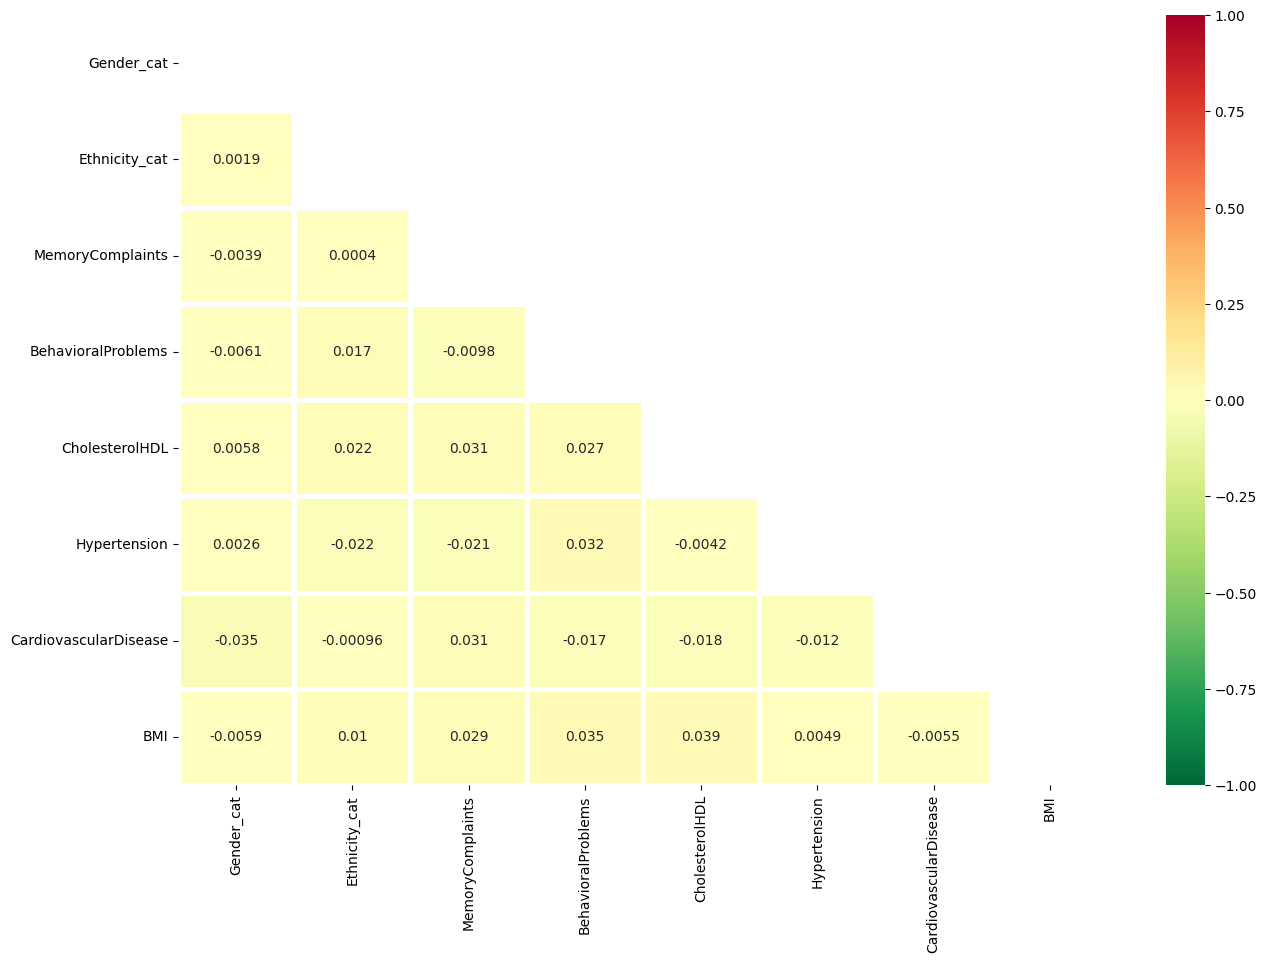

In [27]:
correlation_matrix = df_category.corr()
top_corr_features = correlation_matrix.index
print_heatmap(df_category[top_corr_features].corr())

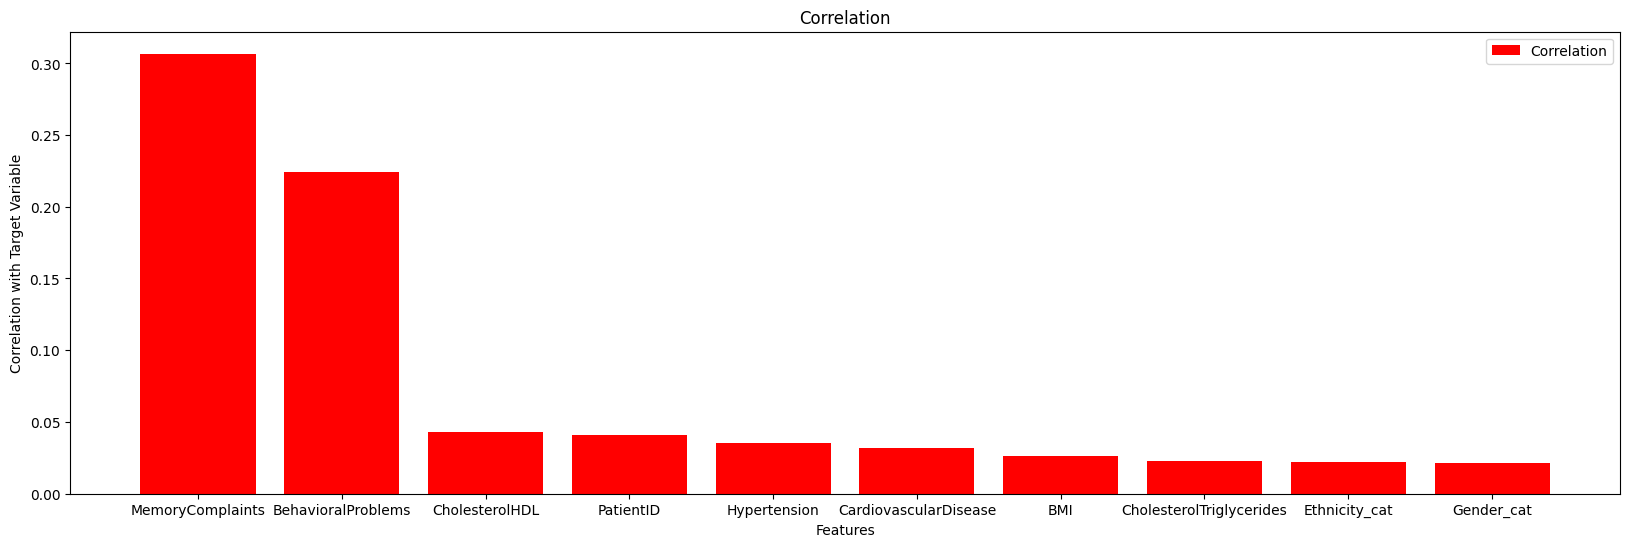

In [28]:
plt.figure(figsize=(20, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
# Calculate correlations on the numeric DataFrame and select the 'Diagnosis' column
correlation_with_diagnosis = numeric_df.corr()['Diagnosis']
# Remove the 'Diagnosis' correlation with itself (which is 1)
correlation_with_diagnosis = correlation_with_diagnosis[correlation_with_diagnosis.index != 'Diagnosis']
# Get the top 10 features and their correlations
top_10_features = correlation_with_diagnosis.sort_values(ascending=False).head(10)

plt.bar(top_10_features.index, top_10_features.values, color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

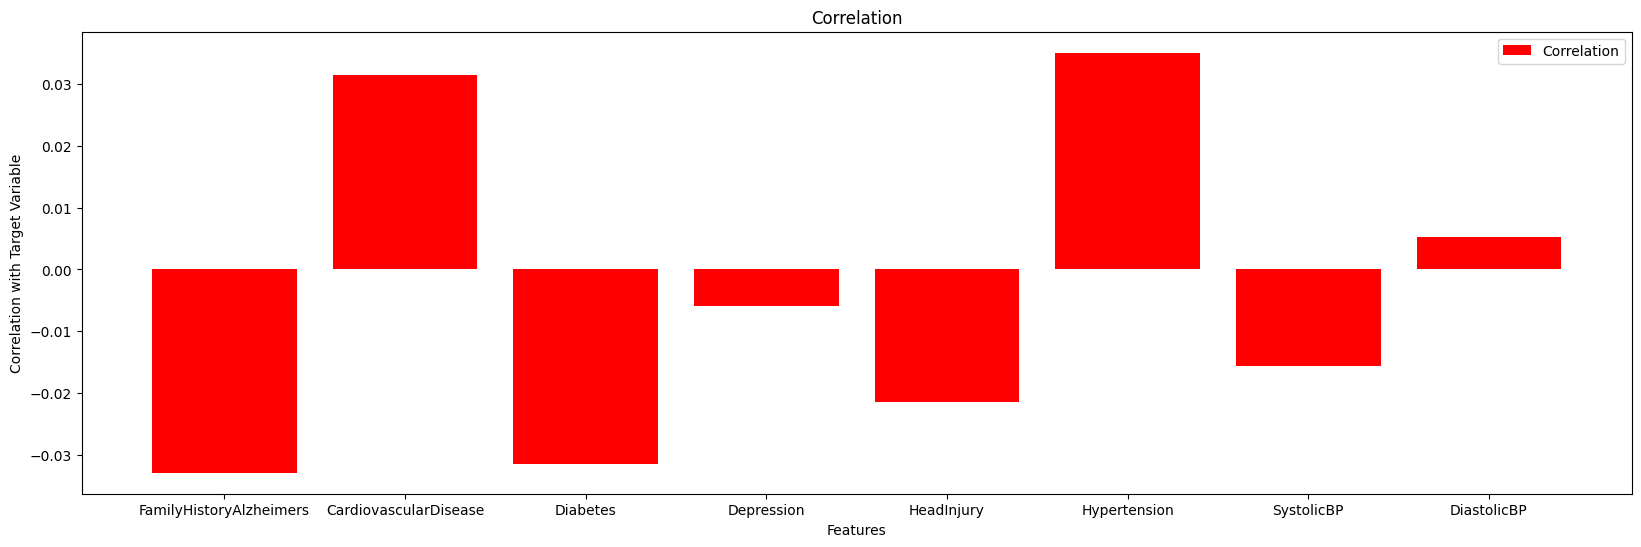

In [29]:
plt.figure(figsize=(20, 6))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlations on the numeric DataFrame and select the 'Diagnosis' column
correlation_with_diagnosis = numeric_df.corr()['Diagnosis']
# Remove the 'Diagnosis' correlation with itself (which is 1)
correlation_with_diagnosis = correlation_with_diagnosis[correlation_with_diagnosis.index != 'Diagnosis']
# Get the desired features from the correlation series
desired_features = df.columns.to_list()[11:19]
# Filter the features from the original df to consider if they are numeric
desired_features = [feature for feature in desired_features if feature in numeric_df.columns]
# get the numeric column names based on selected range
filtered_correlation = correlation_with_diagnosis.loc[desired_features]
# Ensure that the data types are numeric for accurate calculations
# .astype('float64') is unnecessary as we're handling numeric column

plt.bar(filtered_correlation.index, filtered_correlation.values, color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

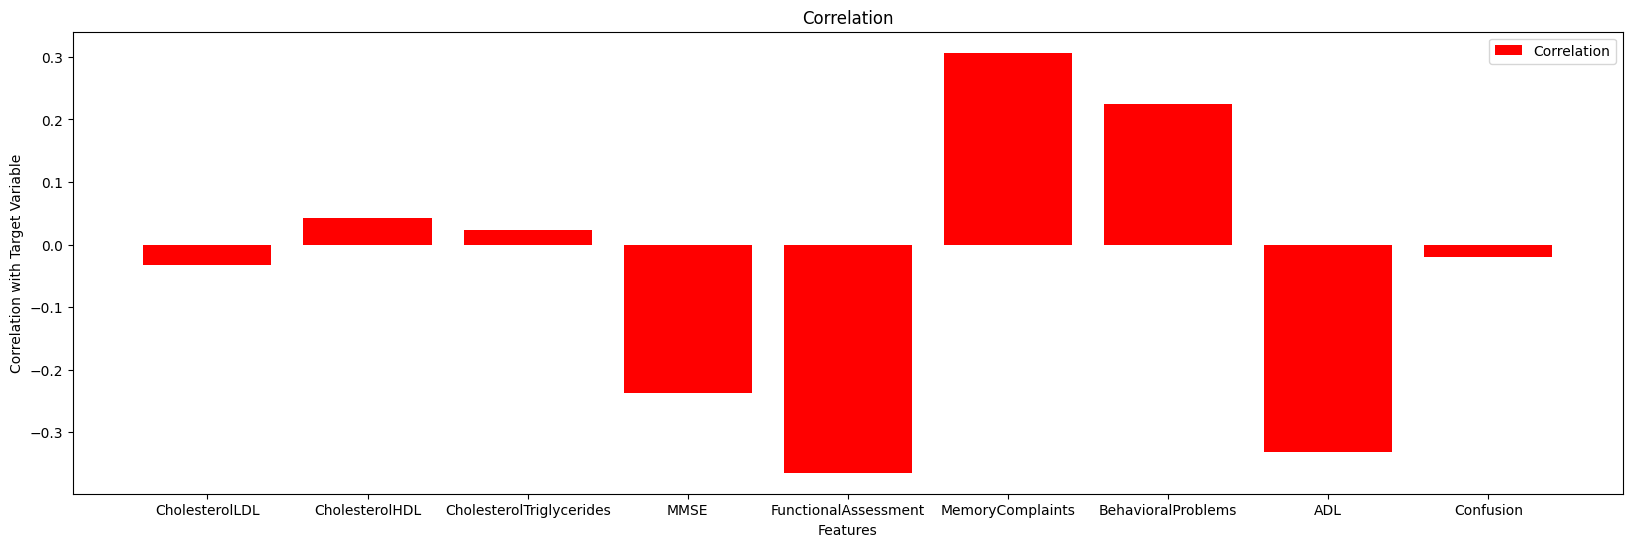

In [30]:
plt.figure(figsize=(20, 6))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
# Calculate correlations on the numeric DataFrame and select the 'diabetes' column
correlation_with_diabetes = numeric_df.corr()['Diagnosis'][:-1]
# Get the desired features
desired_features = df.columns.to_list()[20:29]
# Filter out non-numeric features from the desired features list
desired_features_numeric = [feature for feature in desired_features if feature in numeric_df.columns]

# Get the correlation values for the desired numeric features
correlation_values = correlation_with_diabetes.loc[desired_features_numeric]


plt.bar(correlation_values.index, correlation_values.values, color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

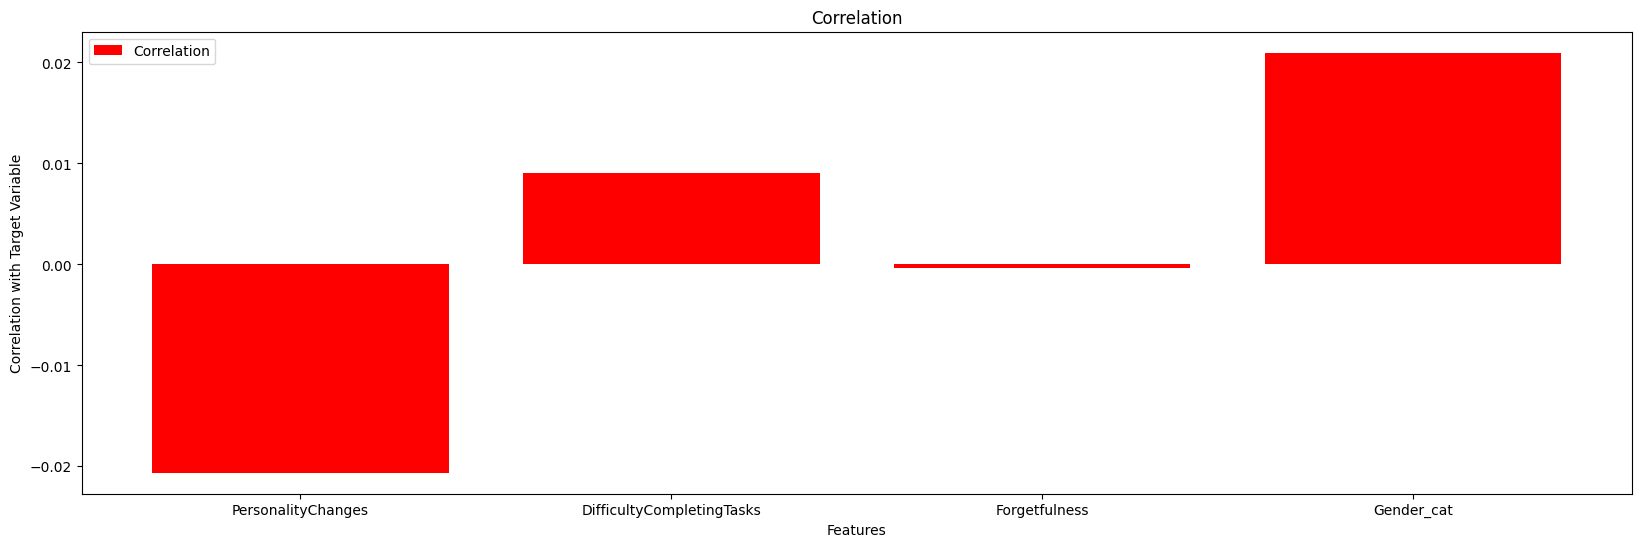

In [31]:
plt.figure(figsize=(20, 6))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlations on the numeric DataFrame and select the 'Diagnosis' column
# Remove [:-1] to include all rows, ensuring 'Diagnosis' is in the index
correlation_with_diagnosis = numeric_df.corr()['Diagnosis']

# Get the desired features from index 30 onwards, filtering for numeric columns
desired_features = df.columns[:-1].to_list()[30:]
desired_features_numeric = [feature for feature in desired_features if feature in numeric_df.columns]

# Remove 'Diagnosis' from desired_features_numeric if it's present
desired_features_numeric = [feature for feature in desired_features_numeric if feature != 'Diagnosis']

# Get correlation values for the desired numeric features
correlation_values = correlation_with_diagnosis.loc[desired_features_numeric]

# Create the bar plot with the filtered data
plt.bar(correlation_values.index, correlation_values.values, color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

# Dimensionality Reduction

In [32]:
# Drop columns that have less than 0.05 correlation with target
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlations on the numeric DataFrame and select the 'Diagnosis' column
features_corr = [(column, correlation)
                 for column, correlation in zip(numeric_df.columns, numeric_df.corr()['Diagnosis'])]

# Column list if correlation > 0.05
features = [item[0] for item in features_corr if item[1] > 0.05]

df[features]

,MemoryComplaints,BehavioralProblems,Diagnosis
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
2144,0,0,1
2145,0,1,1
2146,0,0,1
2147,0,0,1


In [33]:
# Convert columns to numeric where possible
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle columns that cannot be converted, e.g., drop them
        # instead of keeping them as string. This will allow the
        # correlation to be calculated without error
        df = df.drop(columns=[col])

# Calculate the correlation of each column with the target 'Diagnosis' and sort from highest to lowest
correlation_percentages = sorted([(column, correlation * 100)
                                  for column, correlation in zip(df.columns, df.corr()['Diagnosis'])],
                                 key=lambda x: x[1], reverse=True)

# Display the correlation percentage of each column with 'Diagnosis', sorted from highest to lowest
for column, percentage in correlation_percentages:
    print(f"{column}: {percentage:.2f}%")

Diagnosis: 100.00%

MemoryComplaints: 30.67%

BehavioralProblems: 22.44%

CholesterolHDL: 4.26%

PatientID: 4.10%

Hypertension: 3.51%

CardiovascularDisease: 3.15%

BMI: 2.63%

CholesterolTriglycerides: 2.27%

Ethnicity_cat: 2.19%

Gender_cat: 2.10%

DifficultyCompletingTasks: 0.91%

DietQuality: 0.85%

CholesterolTotal: 0.64%

PhysicalActivity: 0.59%

DiastolicBP: 0.53%

Forgetfulness: -0.04%

Smoking: -0.49%

Age: -0.55%

Depression: -0.59%

AlcoholConsumption: -0.76%

Ethnicity: -1.48%

SystolicBP: -1.56%

Confusion: -1.92%

PersonalityChanges: -2.06%

Gender: -2.10%

HeadInjury: -2.14%

Disorientation: -2.46%

Diabetes: -3.15%

CholesterolLDL: -3.20%

FamilyHistoryAlzheimers: -3.29%

EducationLevel: -4.40%

SleepQuality: -5.65%

MMSE: -23.71%

ADL: -33.23%

FunctionalAssessment: -36.49%

In [35]:
# Remove redundant columns
columns_to_remove = [
    'Gender', 'Ethnicity', 'PatientID'
]
df = df.drop(columns=columns_to_remove)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   EducationLevel             2149 non-null   int64  
 2   BMI                        2149 non-null   float64
 3   Smoking                    2149 non-null   int64  
 4   AlcoholConsumption         2149 non-null   float64
 5   PhysicalActivity           2149 non-null   float64
 6   DietQuality                2149 non-null   float64
 7   SleepQuality               2149 non-null   float64
 8   FamilyHistoryAlzheimers    2149 non-null   int64  
 9   CardiovascularDisease      2149 non-null   int64  
 10  Diabetes                   2149 non-null   int64  
 11  Depression                 2149 non-null   int64  
 12  HeadInjury                 2149 non-null   int64  
 13  Hypertension               2149 non-null   int64

In [36]:
df.head(10)

,Age,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Gender_cat,Ethnicity_cat
0,73,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,0,1.725883,0,0,0,1,0,0,1,1
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,0,2.592424,0,0,0,0,1,0,1,1
2,73,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,0,7.119548,0,1,0,1,0,0,1,0
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,1,6.481226,0,0,0,0,0,0,0,1
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,0,0.014691,0,0,1,1,0,0,1,1
5,86,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,...,0,9.015686,1,0,0,0,0,0,0,0
6,68,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,...,0,9.236328,0,0,0,0,1,0,1,0
7,75,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,...,0,4.517248,1,0,0,0,1,1,1,1
8,72,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,...,1,0.756232,0,0,1,0,0,0,0,0
9,87,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,...,1,4.554394,0,0,0,0,0,0,1,1


# Save Dataset

In [37]:
saving_path = path_to_project + '/data/preprocessed/preprocessed-alzheimer-disease.csv' if IN_COLAB else 'data/preprocessed/preprocessed-alzheimer-disease.csv'
df.to_csv(saving_path, sep=',', index=False, encoding='utf-8')

# Report

In [39]:
import os
path_to_project = '/content/drive/MyDrive/FairAlgorithm'
os.makedirs(path_to_project, exist_ok=True)

profile = ProfileReport(df, title='Alzheimer Analysis')
html_file = profile.to_file(path_to_project + '/data/reports/alzheimer_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]